<a href="https://colab.research.google.com/github/goldenkick1-92/music-computing-class-work-2026/blob/main/labAssignment2%20new%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

# import audio files
!git clone https://github.com/jcdevaney/musicComputing2026.git

Cloning into 'musicComputing2026'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 106 (delta 47), reused 11 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 13.45 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
def plotAudio2(sig,sampleRate,title):


   # this version expects the audio file to have already been opened by librosa


   # Adjust the x-axis to represent time


   time=np.arange(0,sig.shape[0])/sampleRate


   # Scale the y-axis to represent amplitude from -1 to 1
   excursion=max(abs(sig))
   sigNew = sig / excursion


   # Label the x and y axes with variables
   xlabel = 'Time (seconds)'
   ylabel = 'Amplitude'


   #plot the signal using the x and y axis variables
   plt.plot(time,sigNew)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   plt.title(title)
   plt.show()


In [3]:
def subplots(plotPos,title,data,time,color,ylabel,xlabel):

    #plot the inputted data into the subplot specified in the list plotPos
    plt.subplot(plotPos[0],plotPos[1],plotPos[2])
    plt.title(title)
    plt.plot(time,data,color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [4]:
def makeEchoes(sig,sr,sec,echoes):

    #calculate the number of bytes which corresponds to the offset in milliseconds
    offset=int(sr*sec)

    #add extra space at the end for the delays
    ending = np.zeros((offset*(len(echoes))))

    delayedSig = np.concatenate((sig,ending))

    for i in range(len(echoes)):

        #create some silence
        # python indexes starting with zero which is why you need to add one
        beginning = np.zeros(offset*(i+1))

        #create delayed version of signal
        delay = np.concatenate((beginning,sig))
        delay = delay * echoes[i]

        #pad the end of delay with zeros to make it the same length as delaysedSig
        delay = np.concatenate((delay,np.zeros((delayedSig.size-delay.size))))

        # combine with output signal
        delayedSig = delayedSig + delay

    return delayedSig

In [5]:
def amplitudeModulation(sig,modulatorFreq,modulatorAmp,modIndex):

    # create a time series from 0 to 1 the length of the inputted sig
    timeSeries = np.linspace(0, 1, len(sig))
    #create a cosine wave modulator with the time series using the inputted modulation frequency
    #with the np.cos function and multiple it by the inputted modulation amplitude
    modulator = modulatorAmp * np.cos (2 * np.pi * modulatorFreq * timeSeries)
    #perform amplitude modulation by multiplying the inputted sig with the modulator
    #(multiplied by 1 + modulation index)
    amMod = (1 + modIndex * modulator) * sig

    #create a time series to represent time for plotting
    time=np.arange(0,sig.shape[0])/sr

    #plot the modulator, the carrier (sig), and the result of the amplitude modulation (amMod)
    subplots([3,1,1],'Modulator signal',modulator,time,'g','Amplitude','Time')
    subplots([3,1,2],'Original (carrier) signal',sig,time,'r','Amplitude','Time')
    subplots([3,1,3],'Amplitude Modulated Signal',amMod,time,'purple','Amplitude','Time')

    plt.subplots_adjust(hspace=1)
    plt.rc('font', size=15)
    fig = plt.gcf()
    fig.set_size_inches(16, 9)

    return amMod

In [6]:
def echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex):

  # plot the original signal in the time domain using plotAudio2()
  plotAudio2(sig,sr,'Original Signal')
  # use makeEchoes() to apply a delay according to the inputted values to the inputted signal
  echoes=makeEchoes(sig,sr,delay,echoes)


  # plot the delay in the time domain using plotAudio2()
  # HOW DO YOU NEED TO MODFIY THIS SO THAT IT IS PLOTTING THE DELYED SIGNAL
  plotAudio2(echoes,sr,'Delayed Signal')

  # use amplitudeModulation() to apply amplitude modulation according to the inputted
  # to the delayed signal and to plot the Modulator Signal, Carrier Signal, and Product Signal
  # as subplots in a single plot
  modulated_echoes = amplitudeModulation(echoes,modulatorFreq,modulatorAmp,modIndex)

  # return the modified signal
  return modulated_echoes

In [7]:
# load original signal
sig , sr = librosa.load('musicComputing2026/audioFiles/avm.wav')
IPython.display.Audio(data=sig, rate=sr)

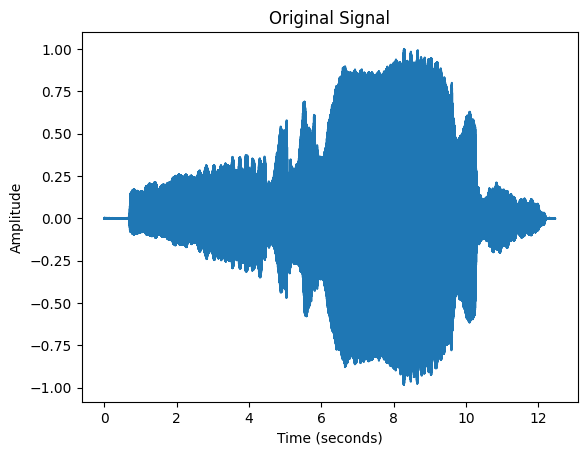

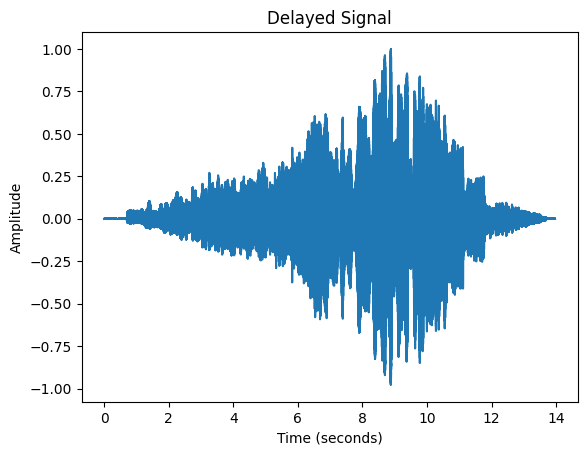

array([ 3.28535592e-04,  9.69942981e-04,  6.34669736e-04, ...,
       -4.53211091e-05, -4.12901139e-04, -4.24303289e-04])

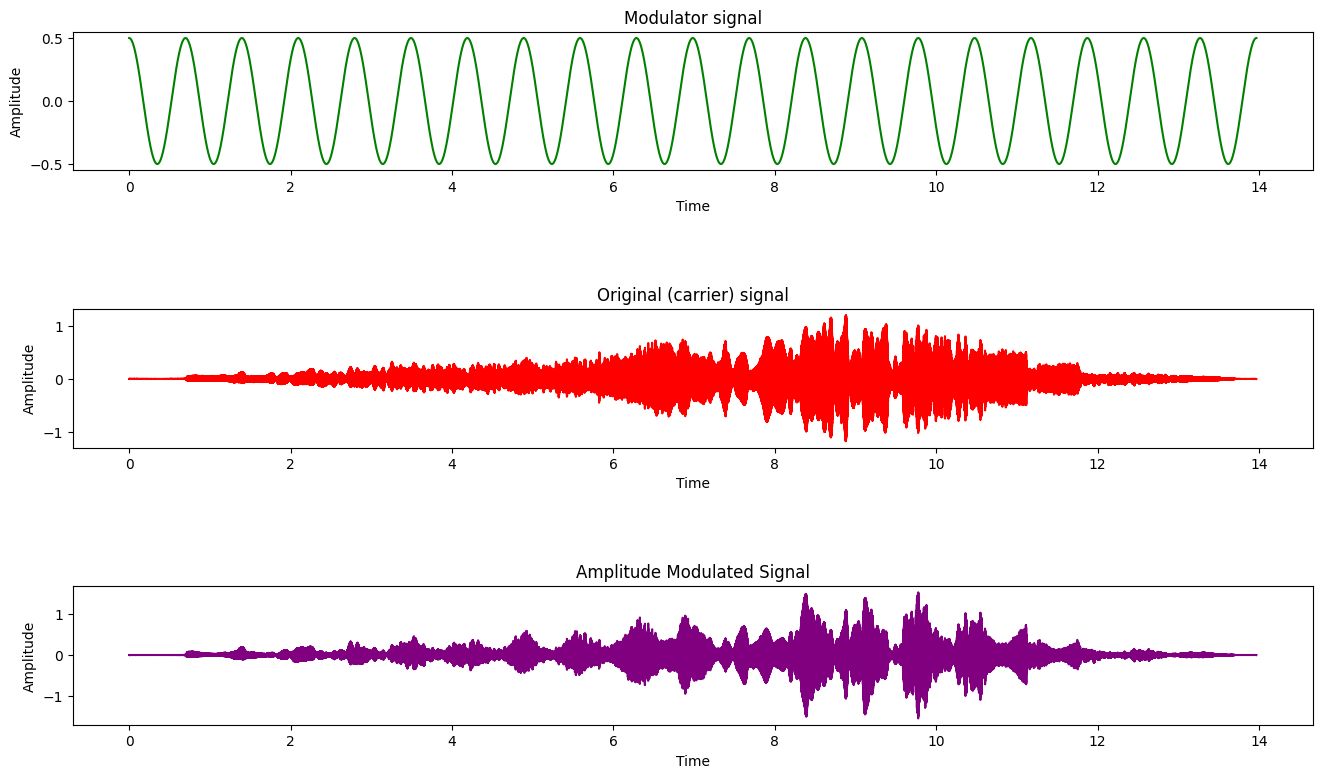

In [8]:
echoes = [1,1,1]
delay = 0.5
modulatorFreq = 20
modulatorAmp = 0.5
modIndex = 1
echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

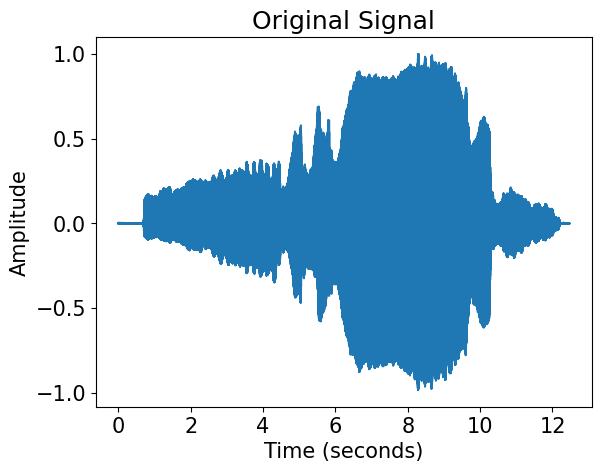

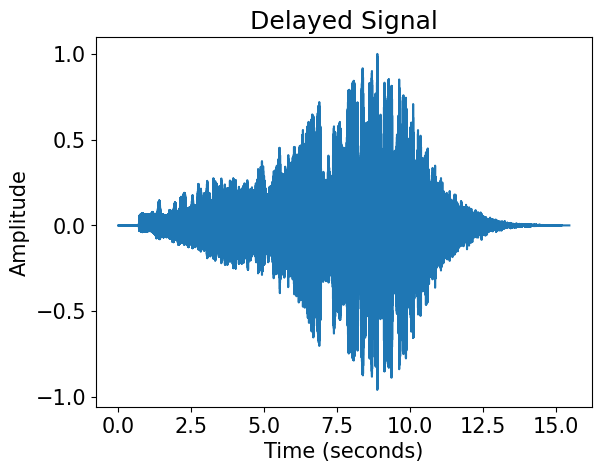

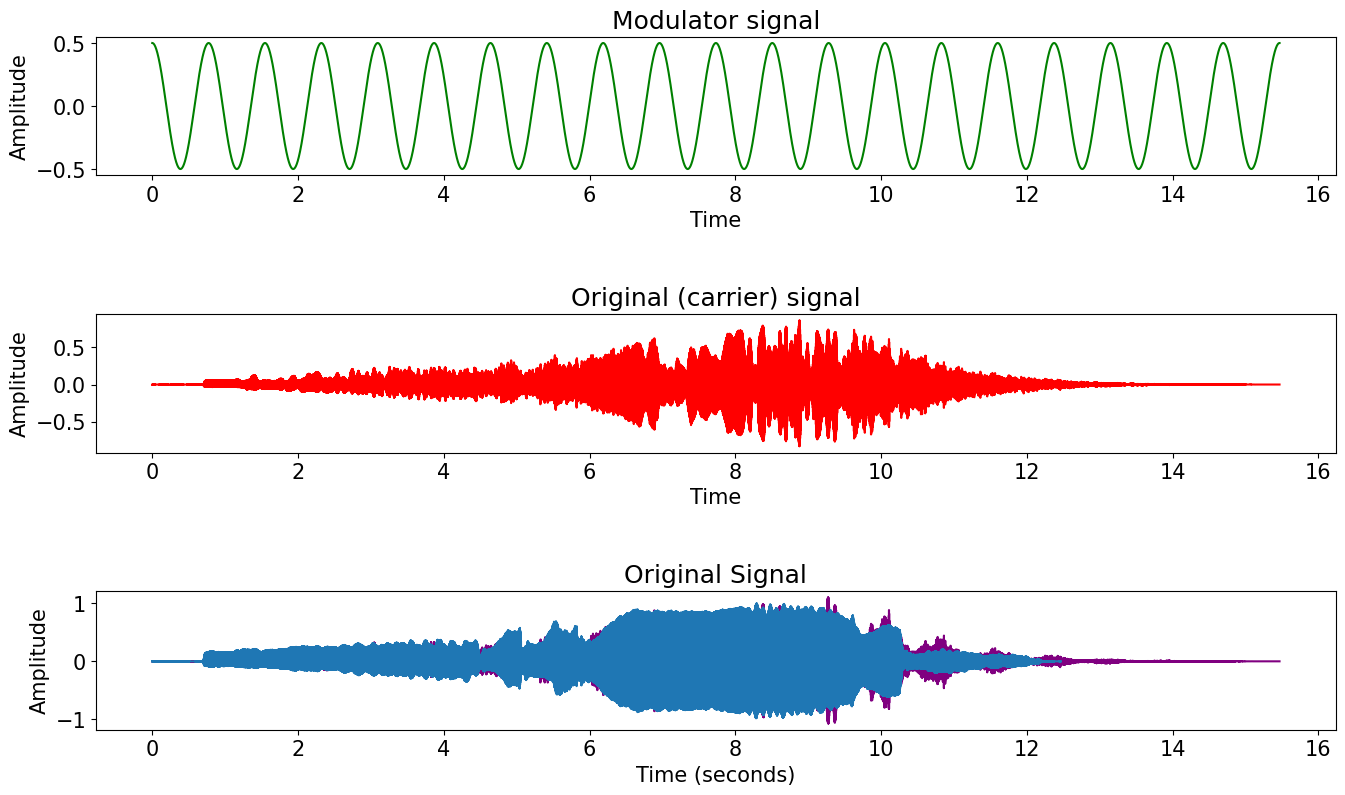

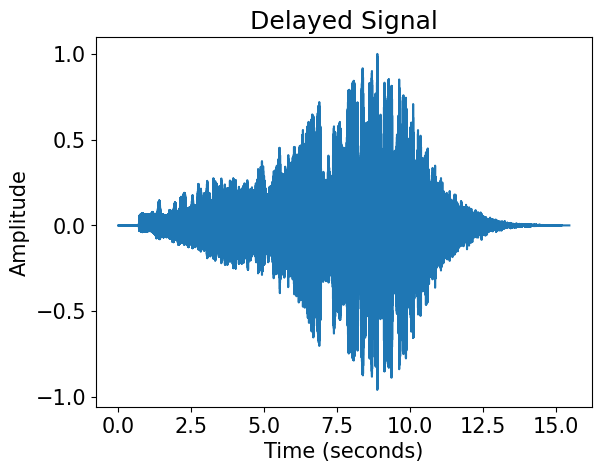

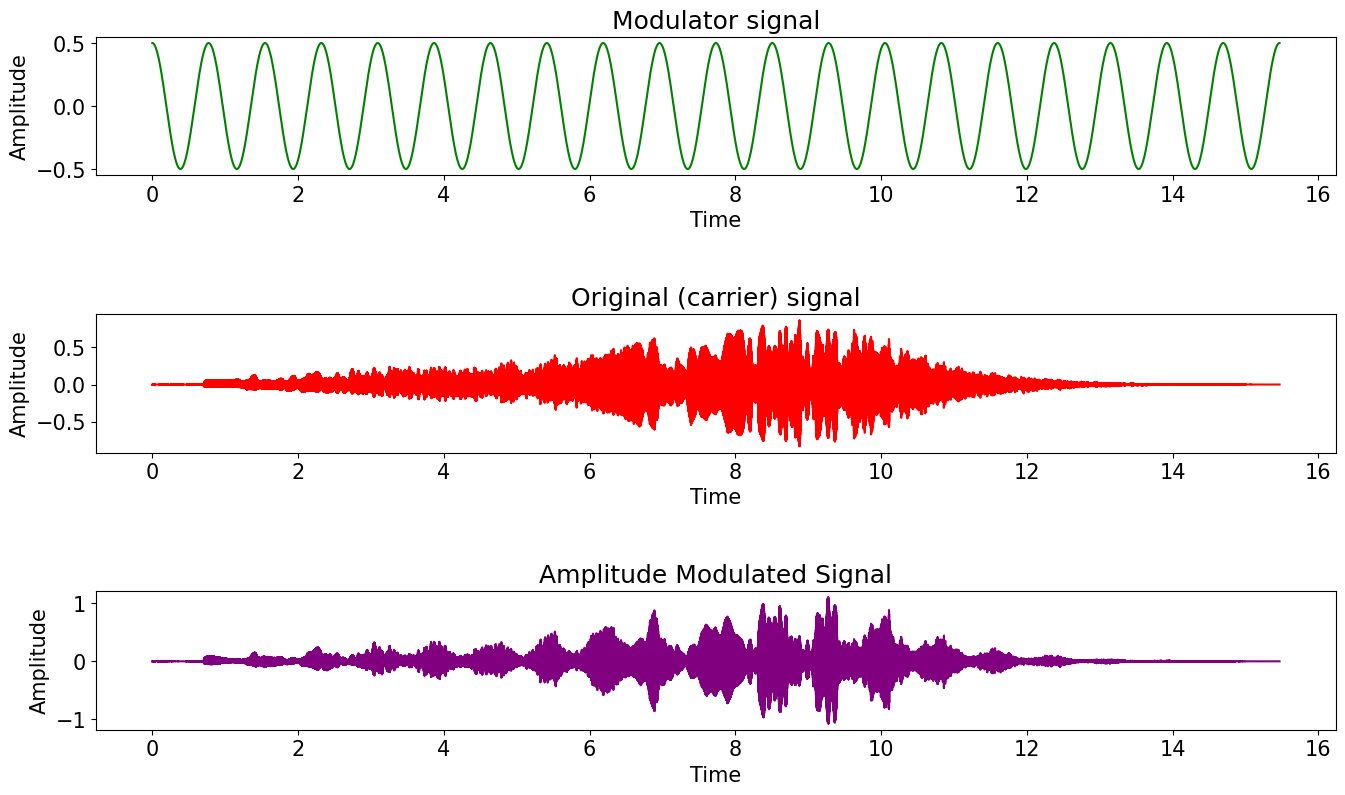

In [9]:
echoes =[1,0.5,0.25,0.125,0.0625,0.03125]
delay = 0.5
echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
modulatorFreq = 20
modulatorAmp = 0.5
modIndex = 1

modSignal2= echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

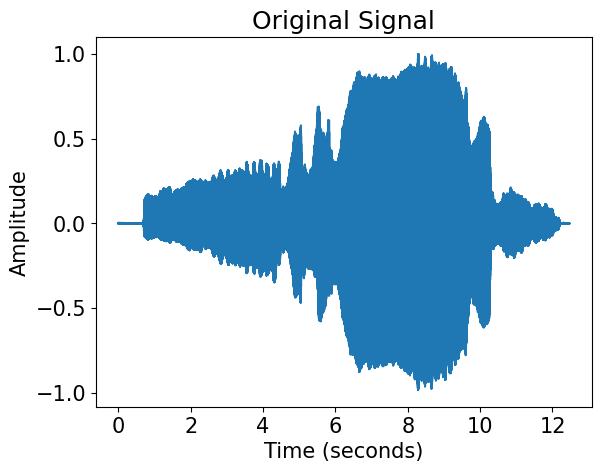

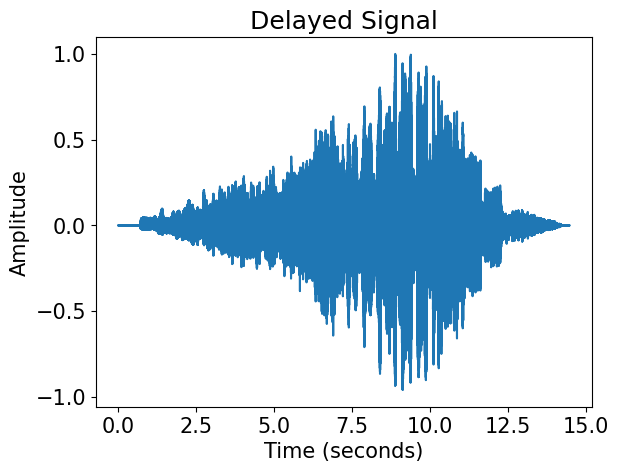

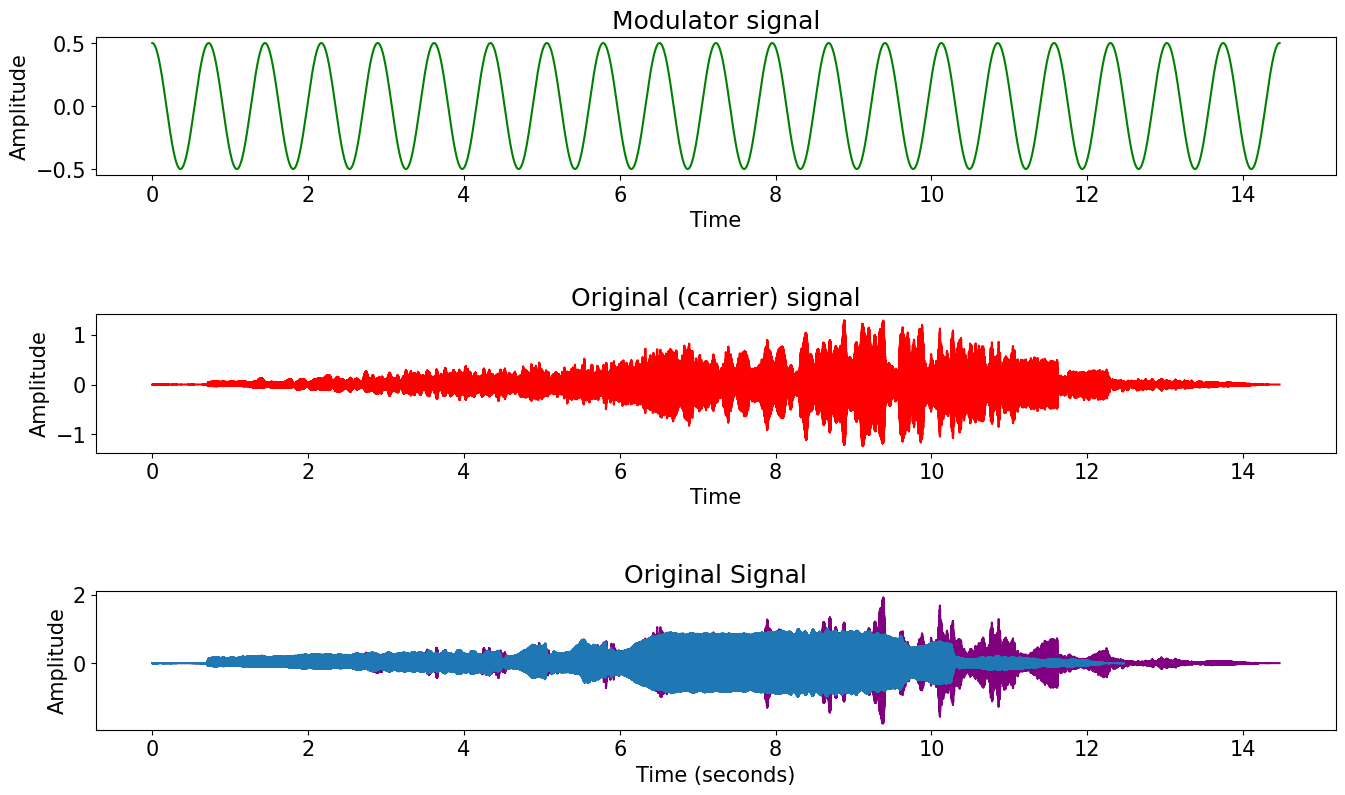

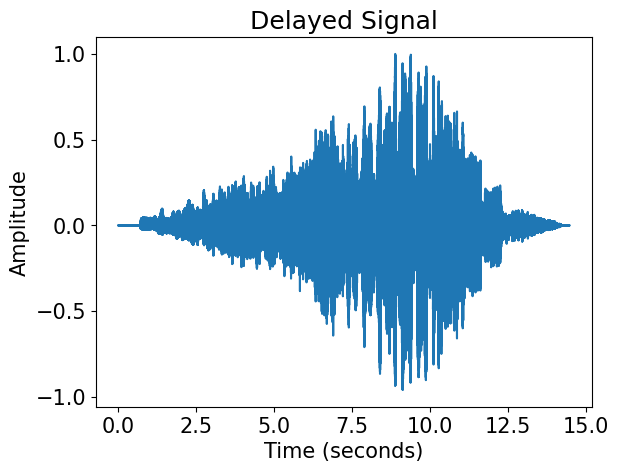

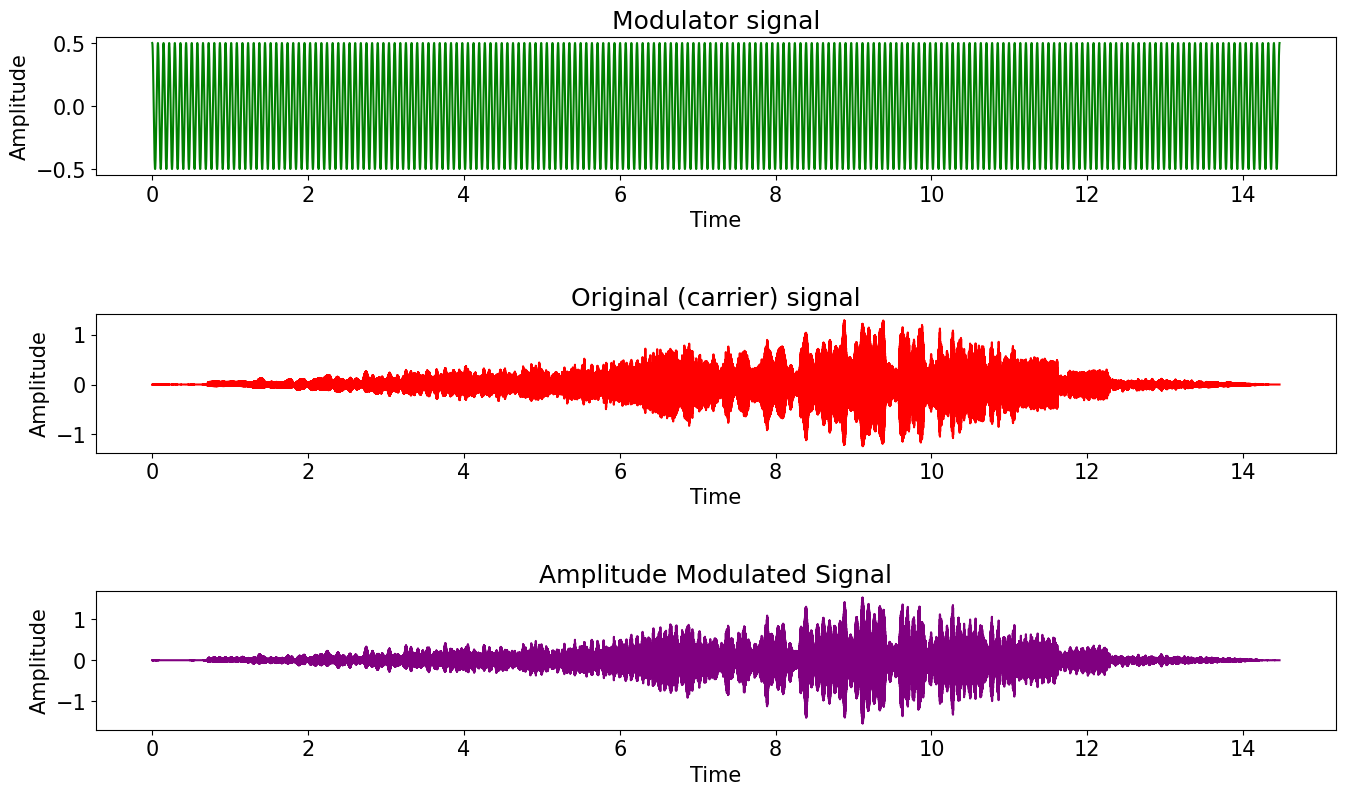

In [10]:
echoes =[1,1,1,1]
delay = 0.5
echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
modulatorFreq = 200
modulatorAmp = 0.5
modIndex = 0.5

modsignal3= echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

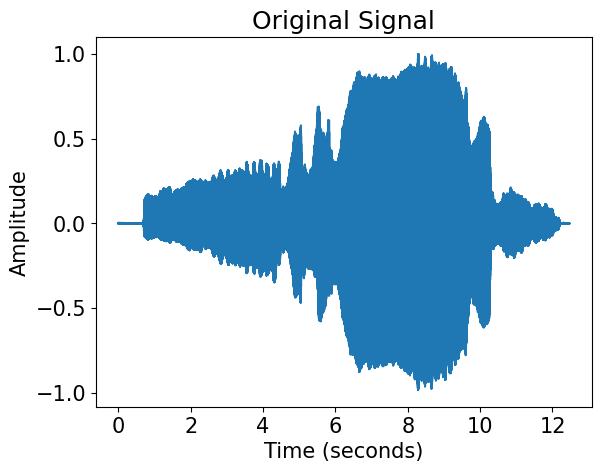

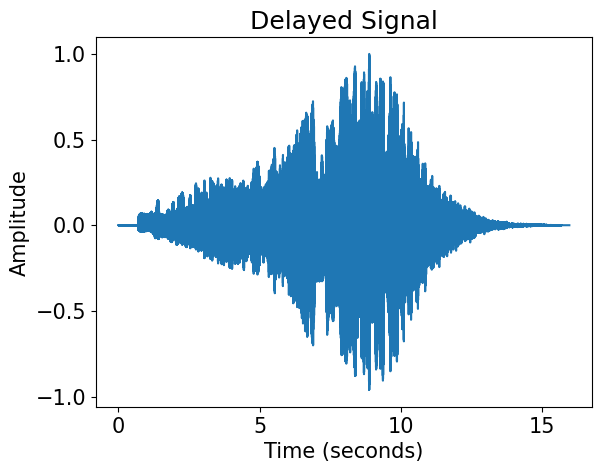

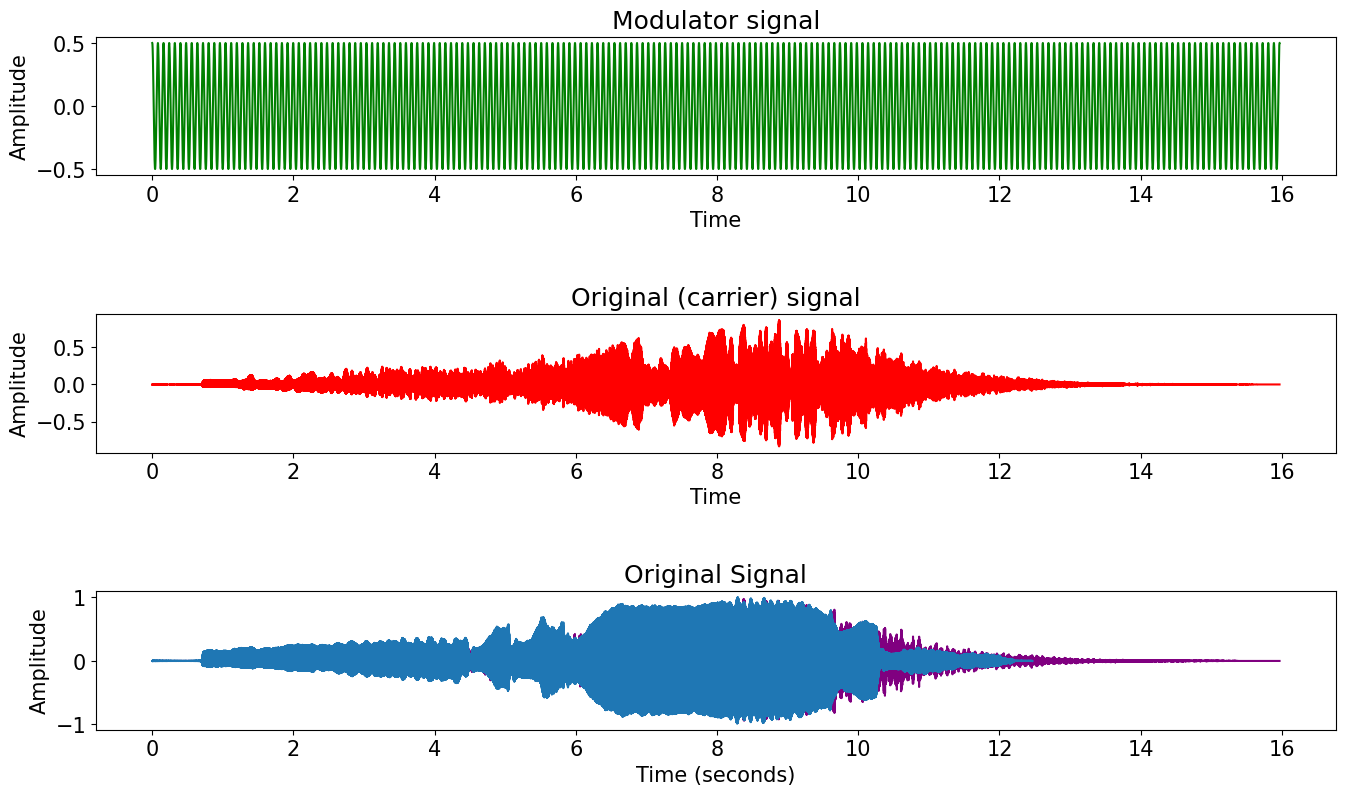

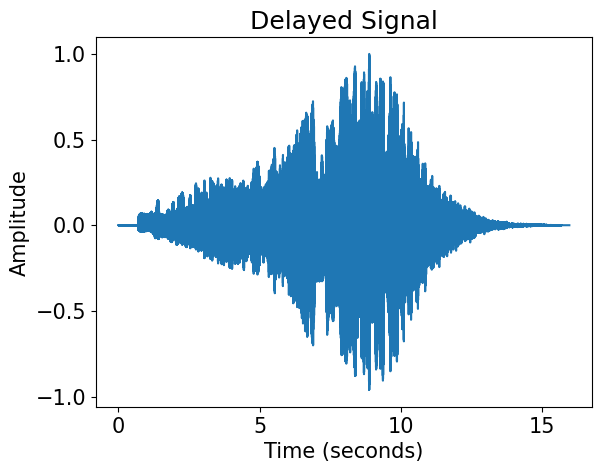

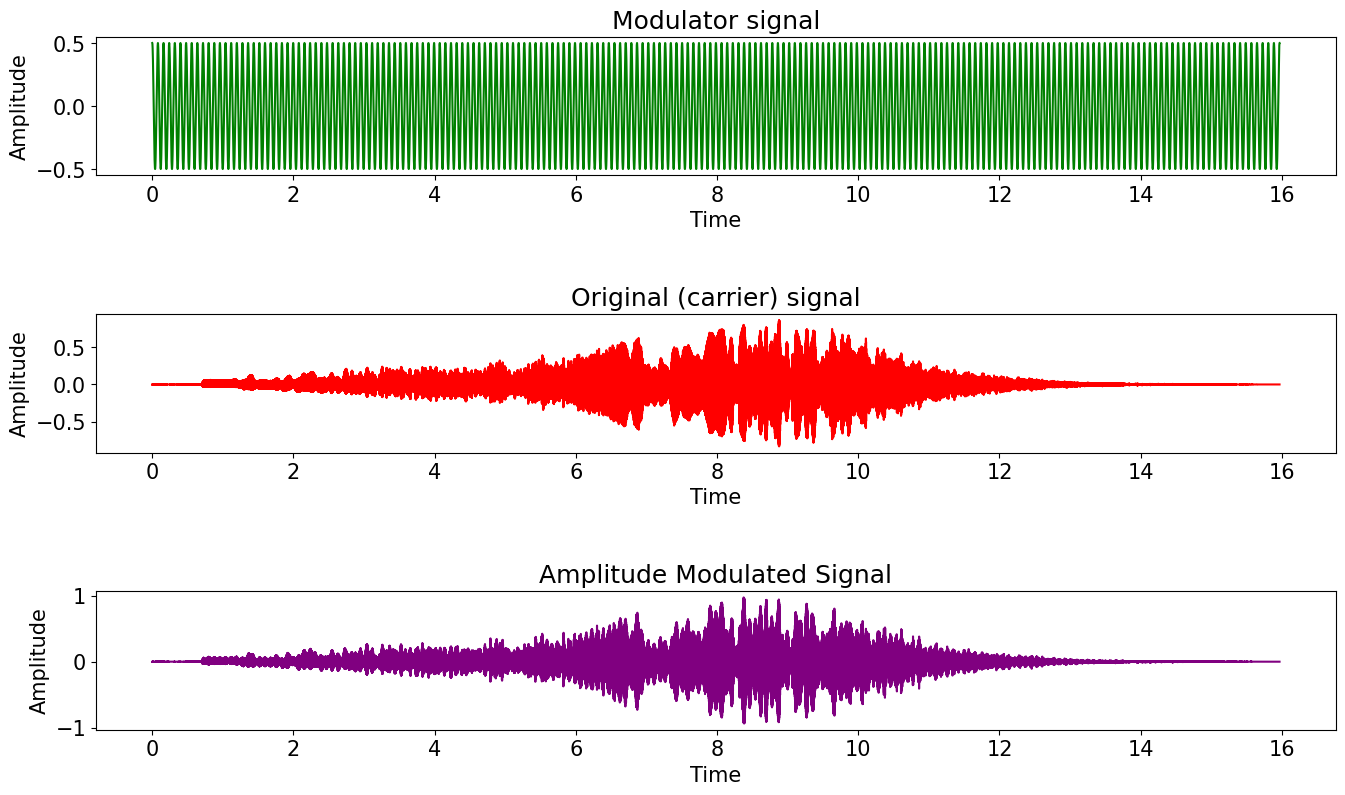

In [11]:
echoes=(1,0.5,0.25,0.125,0.125,0.0625,0.03125)
delay= 0.5
echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)
modulatorFreq = 200
modulatorAmp = 0.5
modIndex = 0.5

modSignal4= echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)



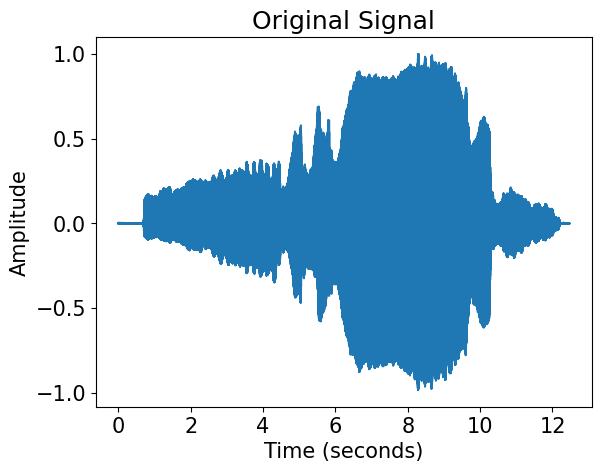

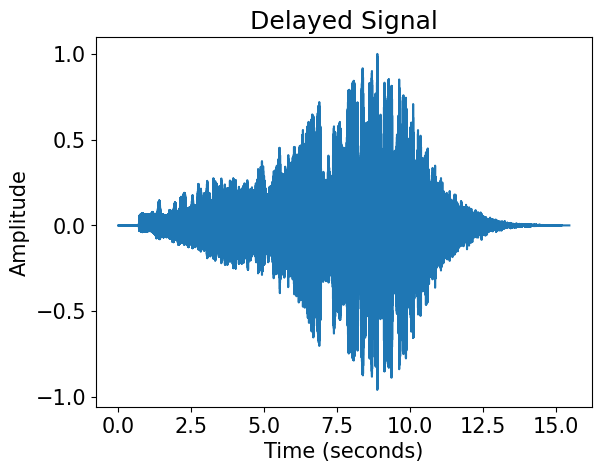

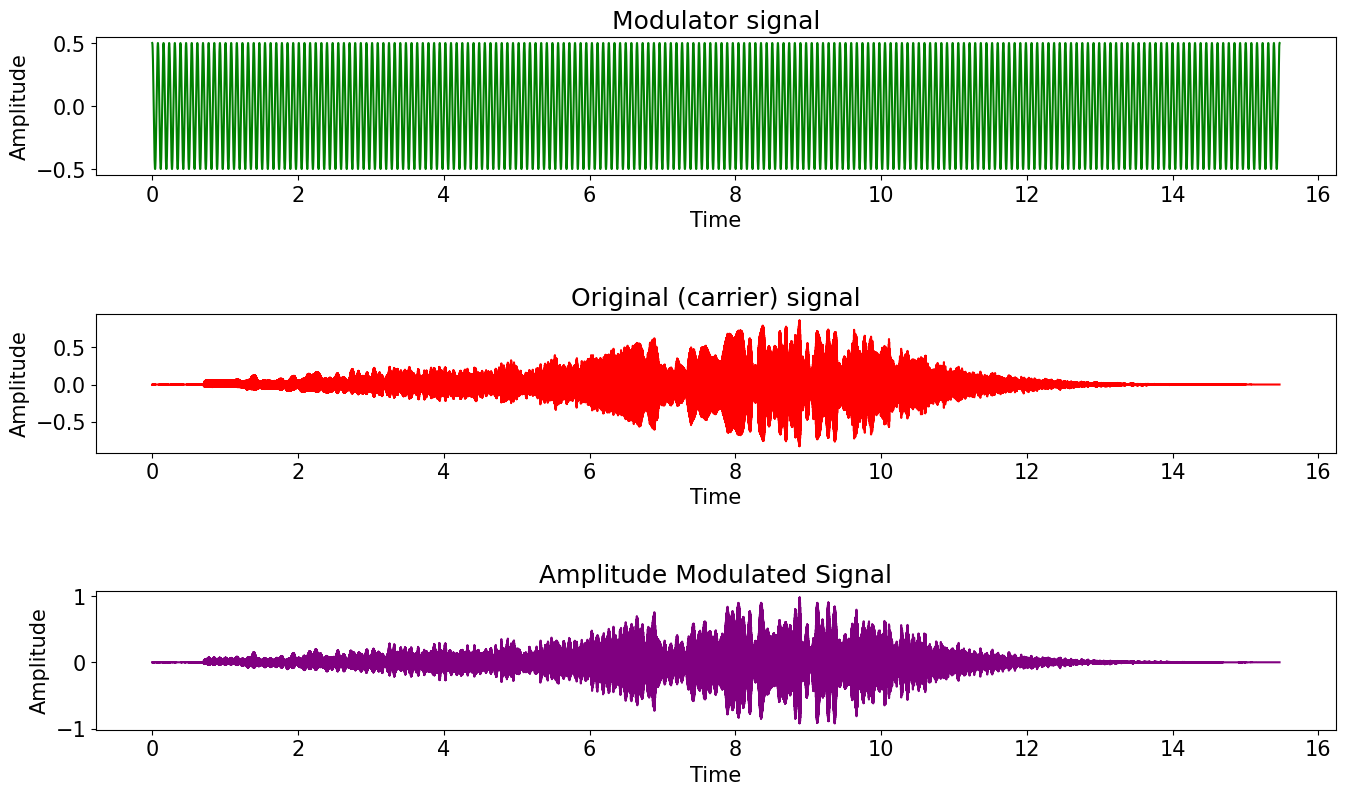

In [12]:
echoes = [1,0.5,0.25,0.125,0.0625,0.03125]
delay = 0.5
modulatorFreq = 200
modulatorAmp = 0.5
modIndex = 0.5

modSignal4 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

IPython.display.Audio(data=modSignal4, rate=sr)

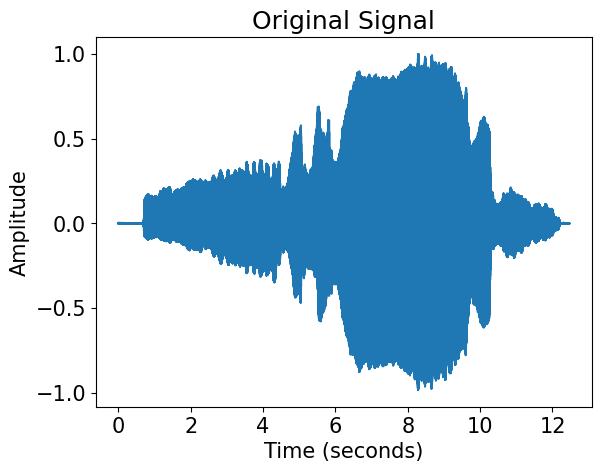

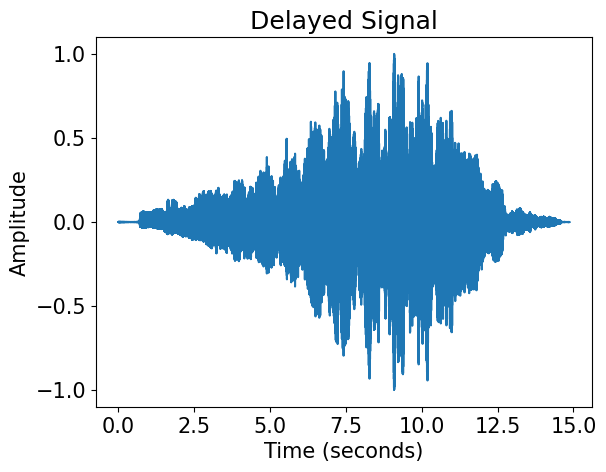

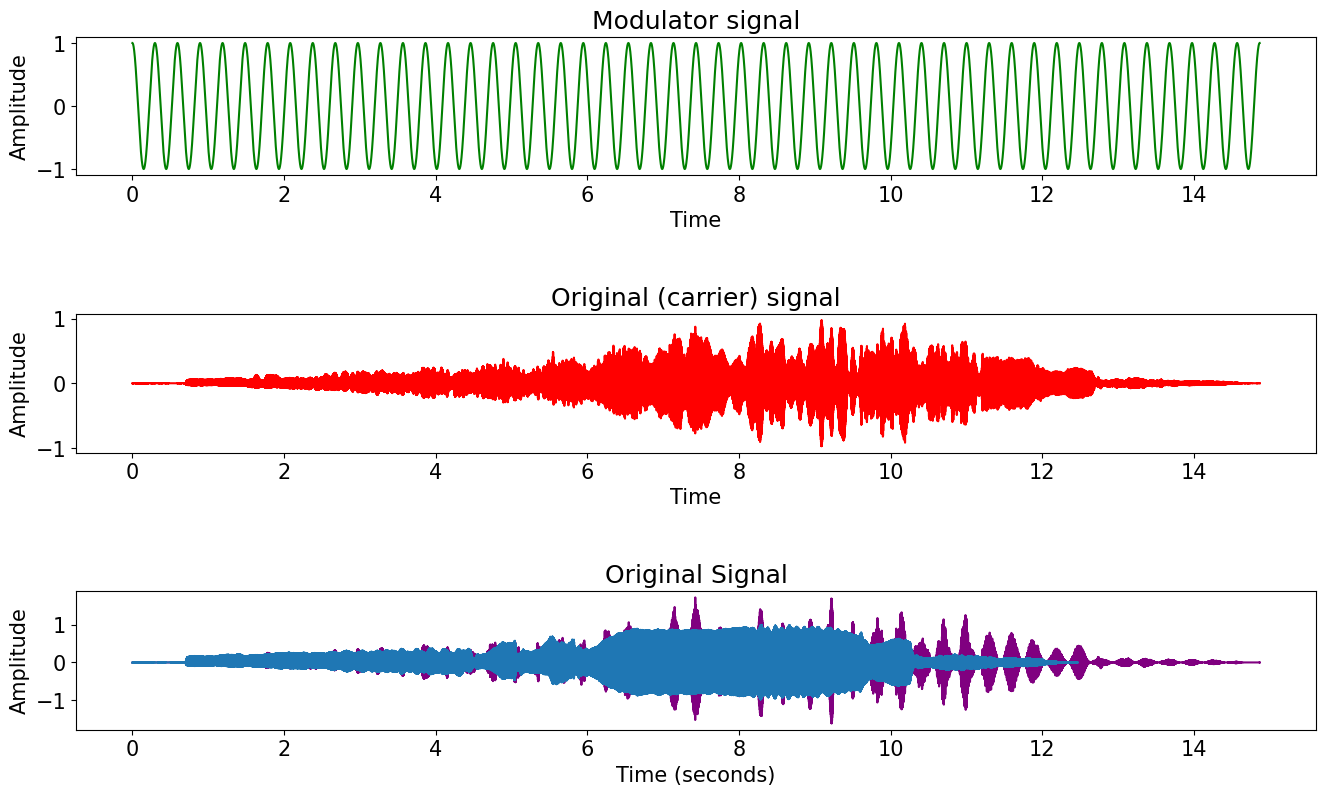

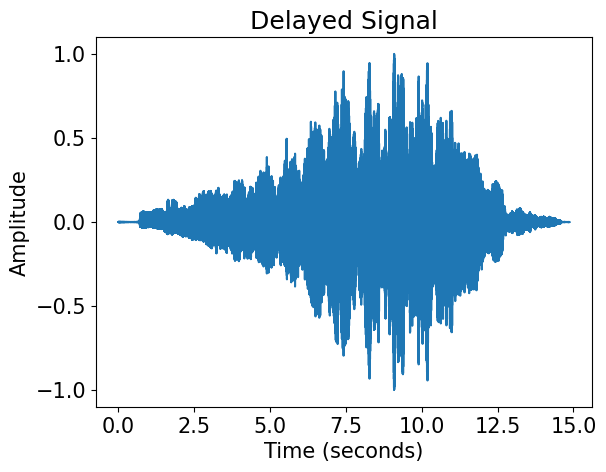

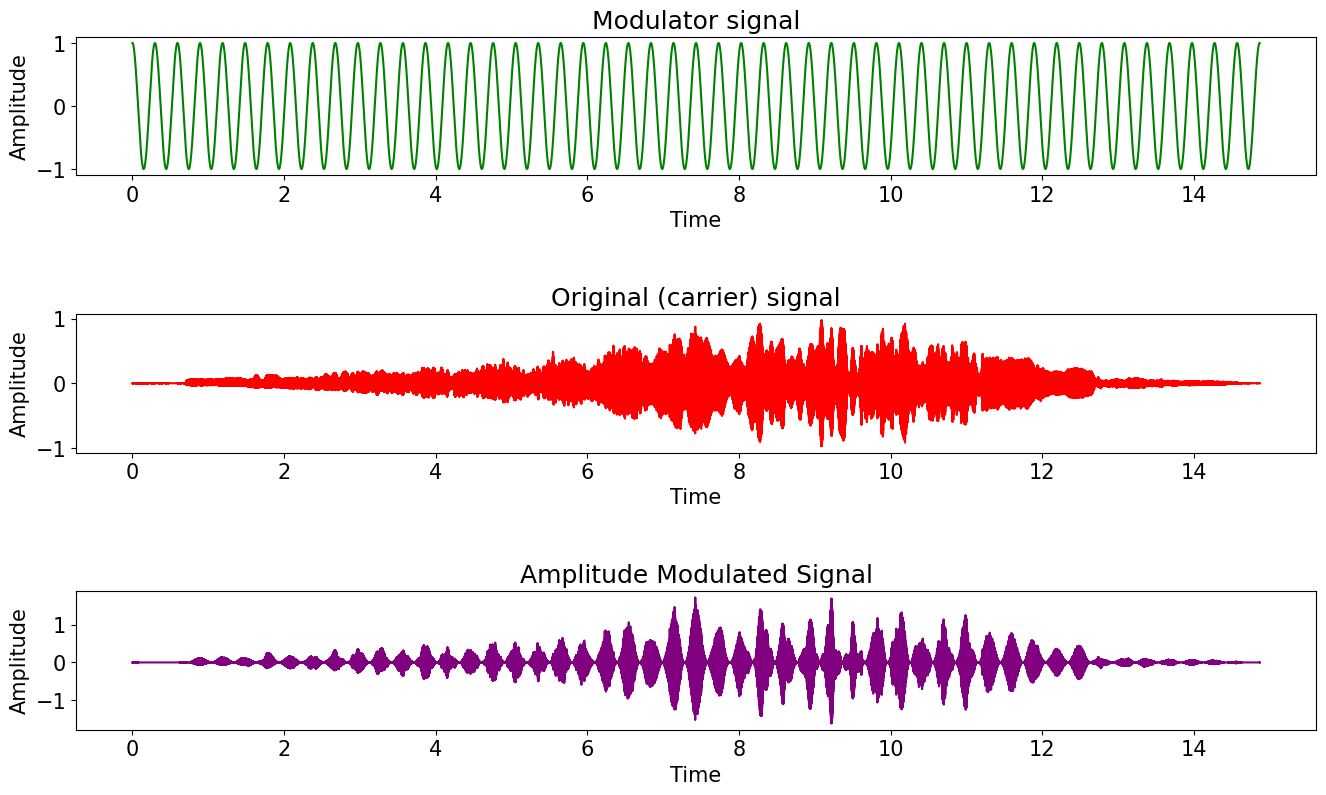

In [13]:
echoes = [1,0.7,0.75]
delay = 0.8
modulatorFreq = 50
modulatorAmp = 1
modIndex = 1

# Call echoAM with the corrected echoes list
echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

modSignal12 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)

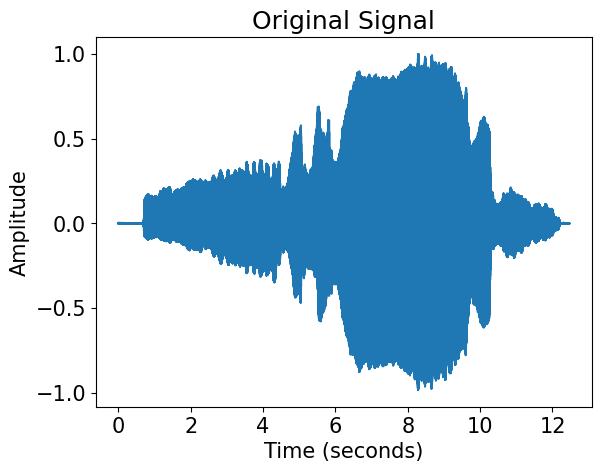

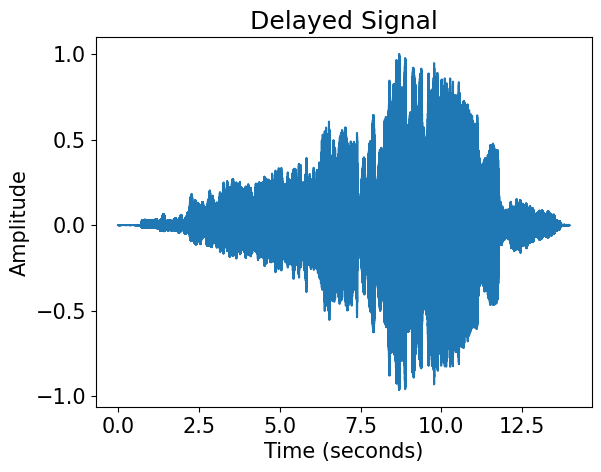

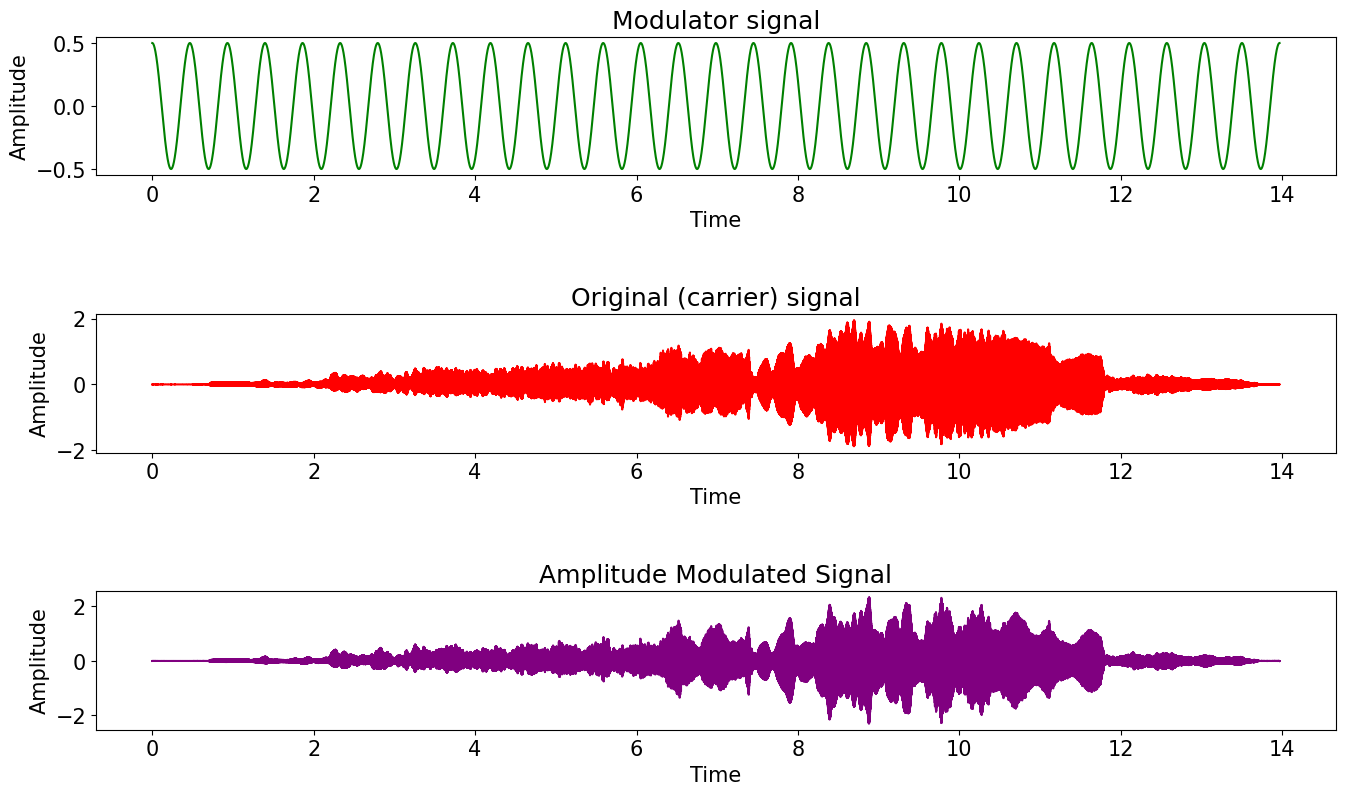

In [14]:
echoes = [1,0.5,4]
delay = 0.5
modulatorFreq = 30
modulatorAmp = 0.5
modIndex = 0.5

modSignal3 = echoAM(sig,sr,delay,echoes,modulatorFreq,modulatorAmp,modIndex)